In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

dataset_name = "sartajbhuvaji/brain-tumor-classification-mri"
zip_file_name = "brain-tumor-classification-mri"
DATASET_TEMP_PATH = "temp"

!kaggle datasets download -d {dataset_name}

!mkdir -p {DATASET_TEMP_PATH}
!unzip {zip_file_name} -d  {DATASET_TEMP_PATH} > /dev/null

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
 94% 82.0M/86.8M [00:02<00:00, 39.1MB/s]
100% 86.8M/86.8M [00:02<00:00, 33.0MB/s]


In [3]:
DATASET_PATH='/content/datasets/brain-mri'
TRAINING_PATH='/content/datasets/brain-mri/Training'
VALIDATION_PATH = '/content/datasets/brain-mri/Validation'
TEST_PATH = '/content/datasets/brain-mri/Testing'

TRAINING_TEMP_PATH='/content/temp/Training'
TEST_TEMP_PATH = '/content/temp/Testing'

In [4]:
import os, cv2

LABELS=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

images_sizes = []

for label in LABELS:
    folder_path = os.path.join(TRAINING_TEMP_PATH, label)
    for image_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, image_name)
        img = cv2.imread(img_path)
        shape = img.shape
        images_sizes.append(shape)

print(list(set(images_sizes))[:5])

[(395, 367, 3), (717, 717, 3), (290, 236, 3), (302, 216, 3), (245, 206, 3)]


In [5]:
import shutil

def remove_empty_folders(folder_path):
    for root, dirs, files in os.walk(folder_path, topdown=False):
        for directory in dirs:
            dir_path = os.path.join(root, directory)
            if not os.listdir(dir_path):
                os.rmdir(dir_path)
                print(f"Removed empty folder: {dir_path}")

def merge_folders(source_dir, root_dir):
    for class_name in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_name)
        if os.path.isdir(class_path):
            root_class_path = os.path.join(root_dir, class_name)
            if not os.path.exists(root_class_path):
                os.makedirs(root_class_path)

            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                if os.path.isfile(file_path):
                    dest_file_path = os.path.join(root_class_path, file_name)
                    if os.path.exists(dest_file_path):
                        base, ext = os.path.splitext(file_name)
                        counter = 1
                        while os.path.exists(dest_file_path):
                            dest_file_path = os.path.join(root_class_path, f"{base}_{counter}{ext}")
                            counter += 1
                    shutil.move(file_path, dest_file_path)
                    print(f"Moved {file_name} to {dest_file_path}")

merge_folders(TRAINING_TEMP_PATH, DATASET_TEMP_PATH)
merge_folders(TEST_TEMP_PATH, DATASET_TEMP_PATH)
remove_empty_folders(DATASET_TEMP_PATH)

Moved m2 (122).jpg to temp/meningioma_tumor/m2 (122).jpg
Moved m2 (143).jpg to temp/meningioma_tumor/m2 (143).jpg
Moved m (174).jpg to temp/meningioma_tumor/m (174).jpg
Moved m (135).jpg to temp/meningioma_tumor/m (135).jpg
Moved m3 (140).jpg to temp/meningioma_tumor/m3 (140).jpg
Moved m (21).jpg to temp/meningioma_tumor/m (21).jpg
Moved m2 (60).jpg to temp/meningioma_tumor/m2 (60).jpg
Moved m3 (112).jpg to temp/meningioma_tumor/m3 (112).jpg
Moved m1(82).jpg to temp/meningioma_tumor/m1(82).jpg
Moved m1(99).jpg to temp/meningioma_tumor/m1(99).jpg
Moved m3 (20).jpg to temp/meningioma_tumor/m3 (20).jpg
Moved m3 (100).jpg to temp/meningioma_tumor/m3 (100).jpg
Moved m1(181).jpg to temp/meningioma_tumor/m1(181).jpg
Moved m (26).jpg to temp/meningioma_tumor/m (26).jpg
Moved m2 (93).jpg to temp/meningioma_tumor/m2 (93).jpg
Moved m1(29).jpg to temp/meningioma_tumor/m1(29).jpg
Moved m (39).jpg to temp/meningioma_tumor/m (39).jpg
Moved m (173).jpg to temp/meningioma_tumor/m (173).jpg
Moved m2 (36

In [6]:
from sklearn.model_selection import train_test_split

for subset_dir in [TRAINING_PATH, VALIDATION_PATH, TEST_PATH]:
    if not os.path.exists(subset_dir):
        os.makedirs(subset_dir)

def split_data(class_name, files, train_size=0.7, val_size=0.15, test_size=0.15):
    train_files, temp_files = train_test_split(files, test_size=(val_size + test_size), random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=(test_size / (val_size + test_size)), random_state=42)
    return train_files, val_files, test_files

for class_name in os.listdir(DATASET_TEMP_PATH):
    class_path = os.path.join(DATASET_TEMP_PATH, class_name)

    if os.path.isdir(class_path):
        train_class_path = os.path.join(TRAINING_PATH, class_name)
        val_class_path = os.path.join(VALIDATION_PATH, class_name)
        test_class_path = os.path.join(TEST_PATH, class_name)

        for subset_class_path in [train_class_path, val_class_path, test_class_path]:
            if not os.path.exists(subset_class_path):
                os.makedirs(subset_class_path)

        files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        train_files, val_files, test_files = split_data(class_name, files)

        for file_name in train_files:
            shutil.move(os.path.join(class_path, file_name), os.path.join(train_class_path, file_name))

        for file_name in val_files:
            shutil.move(os.path.join(class_path, file_name), os.path.join(val_class_path, file_name))

        for file_name in test_files:
            shutil.move(os.path.join(class_path, file_name), os.path.join(test_class_path, file_name))

remove_empty_folders(DATASET_TEMP_PATH)

print("Dataset split and files moved successfully!")


Removed empty folder: temp/meningioma_tumor
Removed empty folder: temp/glioma_tumor
Removed empty folder: temp/pituitary_tumor
Removed empty folder: temp/no_tumor
Dataset split and files moved successfully!


In [7]:
IMG_SIZE = (128, 128)

x_train, x_valid, x_test, y_train, y_valid, y_test = [], [], [], [], [], []

def load_and_resize_img(path):
    img = cv2.imread(path)
    img = cv2.resize(img, IMG_SIZE)
    img = img.astype('float32') / 255.0
    return img

for label in LABELS:
    folder_path = os.path.join(TRAINING_PATH, label)
    for image_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, image_name)
        img = load_and_resize_img(img_path)
        x_train.append(img)
        y_train.append(LABELS.index(label))

for label in LABELS:
    folder_path = os.path.join(VALIDATION_PATH, label)
    for image_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, image_name)
        img = load_and_resize_img(img_path)
        x_valid.append(img)
        y_valid.append(LABELS.index(label))

for label in LABELS:
    folder_path = os.path.join(TEST_PATH, label)
    for image_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, image_name)
        img = load_and_resize_img(img_path)
        x_test.append(img)
        y_test.append(LABELS.index(label))

print(len(x_train))
print(len(x_valid))
print(len(x_test))

2283
490
491


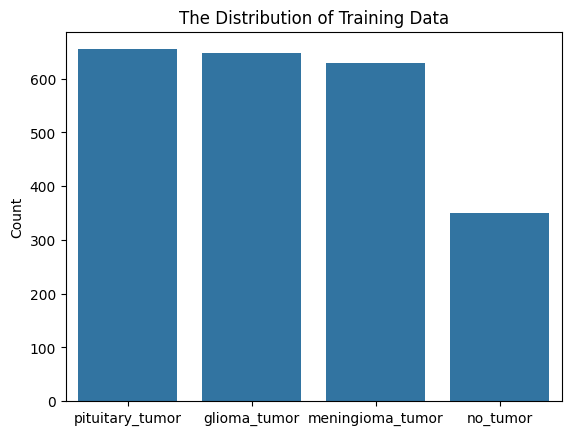

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.barplot(x=['pituitary_tumor', 'glioma_tumor', 'meningioma_tumor', 'no_tumor'],
            y=pd.Series(y_train).value_counts())

plt.title('The Distribution of Training Data')
plt.ylabel('Count')
plt.show()

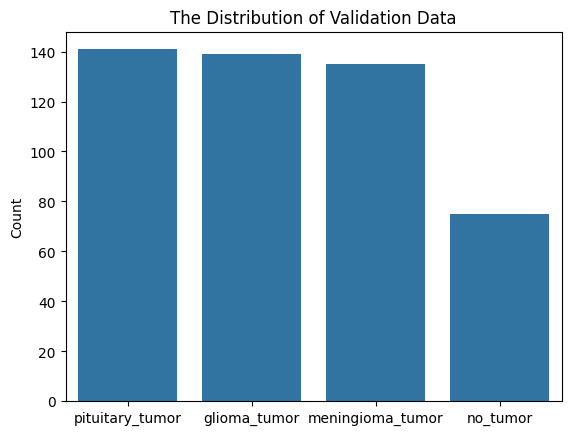

In [ ]:
sns.barplot(x=['pituitary_tumor', 'glioma_tumor', 'meningioma_tumor', 'no_tumor'],
            y=pd.Series(y_valid).value_counts())

plt.title('The Distribution of Validation Data')
plt.ylabel('Count')
plt.show()

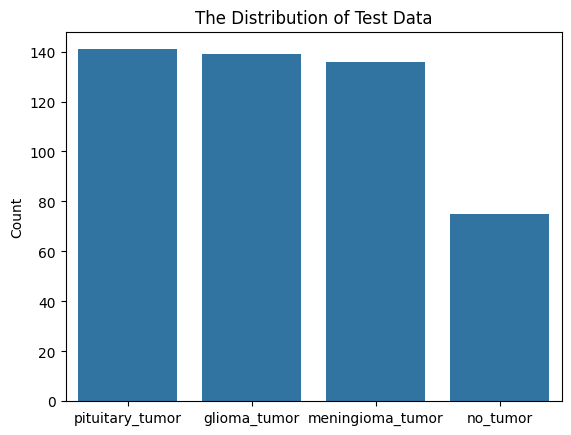

In [ ]:
sns.barplot(x=['pituitary_tumor', 'glioma_tumor', 'meningioma_tumor', 'no_tumor'],
            y=pd.Series(y_test).value_counts())

plt.title('The Distribution of Test Data')
plt.ylabel('Count')
plt.show()

In [8]:
import numpy as np

x_train = np.array(x_train)
y_train = np.array(y_train)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_valid = label_encoder.fit_transform(y_valid)
y_test = label_encoder.fit_transform(y_test)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights_tensor = tf.constant(class_weights, dtype=tf.float32)

y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid, 4)
y_test = to_categorical(y_test, 4)

In [10]:
from tensorflow.keras import backend as K

K.clear_session()

In [ ]:
def squash(vectors, axis=-1):
    s_squared_norm = K.sum(K.square(vectors), axis, keepdims=True)
    scale = s_squared_norm / (1 + s_squared_norm) / K.sqrt(s_squared_norm + K.epsilon())
    return scale * vectors

def margin_loss(y_true, y_pred, class_weights):
    lamb, margin = 0.5, 0.1
    loss = y_true * K.square(K.relu(1 - margin - y_pred)) + lamb * (
        1 - y_true) * K.square(K.relu(y_pred - margin))
    y_true_indices = tf.argmax(y_true, axis=-1)

    weights = tf.gather(class_weights, y_true_indices)
    weighted_loss = loss * tf.expand_dims(weights, axis=-1)

    return K.sum(weighted_loss, axis=-1)

def margin_loss_with_class_weights(class_weights):
    def loss(y_true, y_pred):
        return margin_loss(y_true, y_pred, class_weights)
    return loss

In [ ]:
from tensorflow.keras import activations
from tensorflow.keras.layers import Layer

class Capsule(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(Capsule, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_capsule_dim = input_shape[-1]
        self.kernel = self.add_weight(
                        name='capsule_kernel',
                        shape=(1, input_capsule_dim,
                                self.num_capsule * self.dim_capsule),
                        initializer='glorot_uniform',
                        trainable=True)

    def call(self, inputs):
        hat_inputs = K.conv1d(inputs, self.kernel)
        batch_size = K.shape(inputs)[0]
        input_num_capsule = K.shape(inputs)[1]
        hat_inputs = K.reshape(hat_inputs,
                               (batch_size, input_num_capsule,
                                self.num_capsule, self.dim_capsule))
        hat_inputs = K.permute_dimensions(hat_inputs, (0, 2, 1, 3))

        b = K.zeros_like(hat_inputs[:,:,:,0])
        for i in range(self.routings):
            c = K.softmax(b, 1)
            o = tf.einsum('bin,binj->bij', c, hat_inputs)
            if i < self.routings - 1:
                o = K.l2_normalize(o, -1)
                b = tf.einsum('bij,binj->bin', o, hat_inputs)

        return squash(o)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization
from tensorflow.keras.layers import AveragePooling2D, Reshape, Lambda, Dropout
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model, optimizers
from tensorflow.keras.regularizers import l2

def conv_block(input_layer):
    x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001))(input_layer)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.3)(x)
    x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.3)(x)
    x = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001))(x)
    return x

def primary_capsule_block(x):
    x = Reshape((-1, 128))(x)
    x = Capsule(32, 8, 3)(x)
    return x

def class_capsule_block(x):
    x = Capsule(4, 16, 3)(x)
    output = Lambda(lambda z: K.sqrt(K.sum(K.square(z), 2)))(x)
    return output

input = Input(shape=(None, None, 3))
conv_output = conv_block(input)
primary_caps = primary_capsule_block(conv_output)
output = class_capsule_block(primary_caps)

model = Model(inputs=[input], outputs=[output])

adam = optimizers.Adam(learning_rate=1e-4)

model.compile(loss=margin_loss_with_class_weights(class_weights_tensor), optimizer=adam, metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, None, None, 32)      │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, None, None, 32)      │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, None, None, 32)      │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, None, None, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, None, None, 32)      │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, None, None, 32)      │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, None, None, 32)      │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, None, None, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, None, None, 64)      │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, None, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ capsule_2 (Capsule)                  │ (None, 32, 8)               │          32,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ capsule_3 (Capsule)                  │ (None, 4, 16)               │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,600 (459.38 KB)

 Trainable params: 117,472 (458.88 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(2283, 128, 128, 3)
(2283, 4)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

BATCH_SIZE = 16
EPOCHS = 100

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10,
                                                  min_lr=1e-10, mode='min')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    [x_train], [y_train],
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=[[x_valid], [y_valid]],
    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 47s 218ms/step - accuracy: 0.4238 - loss: 0.5743 - val_accuracy: 0.2408 - val_loss: 0.6541 - learning_rate: 1.0000e-04
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.5242 - loss: 0.5086 - val_accuracy: 0.2367 - val_loss: 0.6449 - learning_rate: 1.0000e-04
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.5578 - loss: 0.4777 - val_accuracy: 0.3449 - val_loss: 0.6030 - learning_rate: 1.0000e-04
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.6118 - loss: 0.4479 - val_accuracy: 0.3898 - val_loss: 0.5725 - learning_rate: 1.0000e-04
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.6182 - loss: 0.4286 - val_accuracy: 0.5122 - val_loss: 0.4685 - learning_rate: 1.0000e-04
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.5979 - loss: 0.4270 - val_accuracy: 0.4959 - val_loss: 0.4847 - learning_rate: 1.0000e-04
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 6

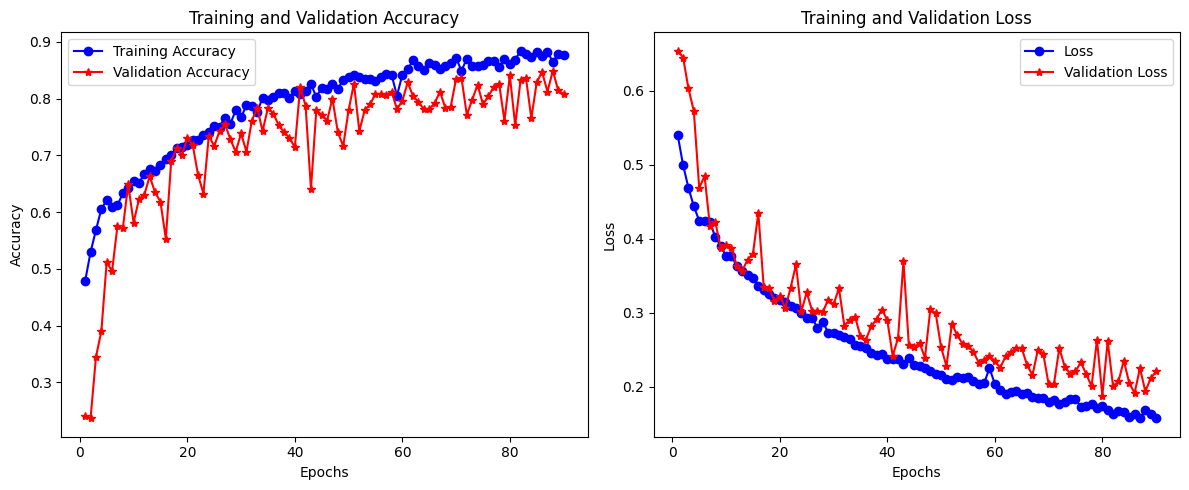

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

history_df = history.history

acc = history_df['accuracy']
val_acc = history_df['val_accuracy']
loss = history_df['loss']
val_loss = history_df['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate([x_test], [y_test], batch_size=BATCH_SIZE)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.7230 - loss: 0.2380
Test Loss: 0.1919989436864853
Test Accuracy: 0.8289205431938171


In [ ]:
y_pred= model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 235ms/step


In [ ]:
y_pred = np.argmax(y_pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_new,y_pred))


              precision    recall  f1-score   support

           0       0.94      0.67      0.78       139
           1       0.73      0.82      0.78       141
           2       0.84      0.89      0.86        75
           3       0.85      0.96      0.90       136

    accuracy                           0.83       491
   macro avg       0.84      0.84      0.83       491
weighted avg       0.84      0.83      0.83       491



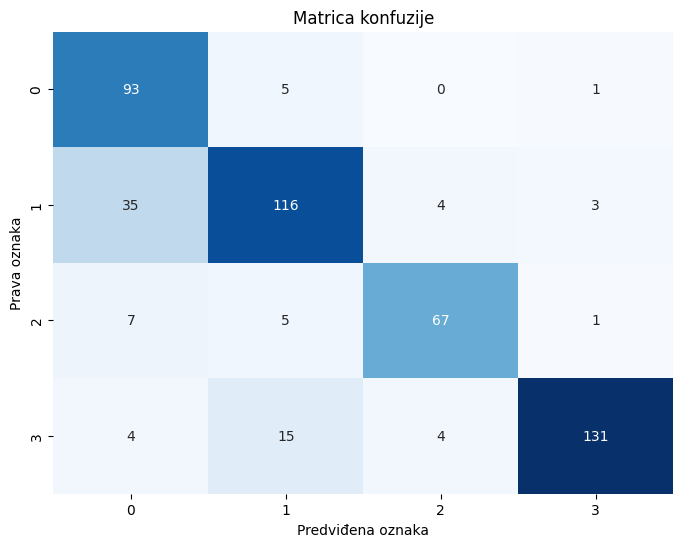

In [ ]:
cm = confusion_matrix(y_pred, y_test_new)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrica konfuzije")
plt.xlabel("Predviđena oznaka")
plt.ylabel("Prava oznaka")

plt.show()

In [41]:
def weighted_categorical_crossentropy(y_true, y_pred, weights):
    weights = K.constant(np.array(weights))
    y_true = K.cast(y_true, 'float32')
    weights_applied = K.sum(y_true * weights, axis=-1)
    return K.categorical_crossentropy(y_true, y_pred) * weights_applied

In [48]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import Model, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

def conv_block(input_layer):
    x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)

    x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)

    x = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001), padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.4)(x)

    return x

input = Input(shape=(128, 128, 3))
conv_output = conv_block(input)

x = Flatten()(conv_output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=[input], outputs=[output])

adam = optimizers.Adam(learning_rate=1e-4)

model.compile(loss=lambda y_true, y_pred: weighted_categorical_crossentropy(y_true, y_pred, class_weights),
              optimizer=adam, metrics=['accuracy'])

model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,312,292 (16.45 MB)

 Trainable params: 4,312,164 (16.45 MB)

 Non-trainable params: 128 (512.00 B)

In [49]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

BATCH_SIZE = 8
EPOCHS = 100

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10,
                                                  min_lr=1e-10, mode='min')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    [x_train], [y_train],
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=[[x_valid], [y_valid]],
    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.2765 - loss: 2.1494 - val_accuracy: 0.2755 - val_loss: 1.5852 - learning_rate: 1.0000e-04
Epoch 2/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3988 - loss: 1.4876 - val_accuracy: 0.5265 - val_loss: 1.3914 - learning_rate: 1.0000e-04
Epoch 3/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4857 - loss: 1.3468 - val_accuracy: 0.6204 - val_loss: 1.1580 - learning_rate: 1.0000e-04
Epoch 4/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5634 - loss: 1.2503 - val_accuracy: 0.5776 - val_loss: 1.1296 - learning_rate: 1.0000e-04
Epoch 5/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6161 - loss: 1.1069 - val_accuracy: 0.6367 - val_loss: 1.0292 - learning_rate: 1.0000e-04
Epoch 6/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6292 - loss: 1.0756 - val_accuracy: 0.6735 - val_loss: 0.9622 - learning_rate: 1.0000e-04
Epoch 7/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/st

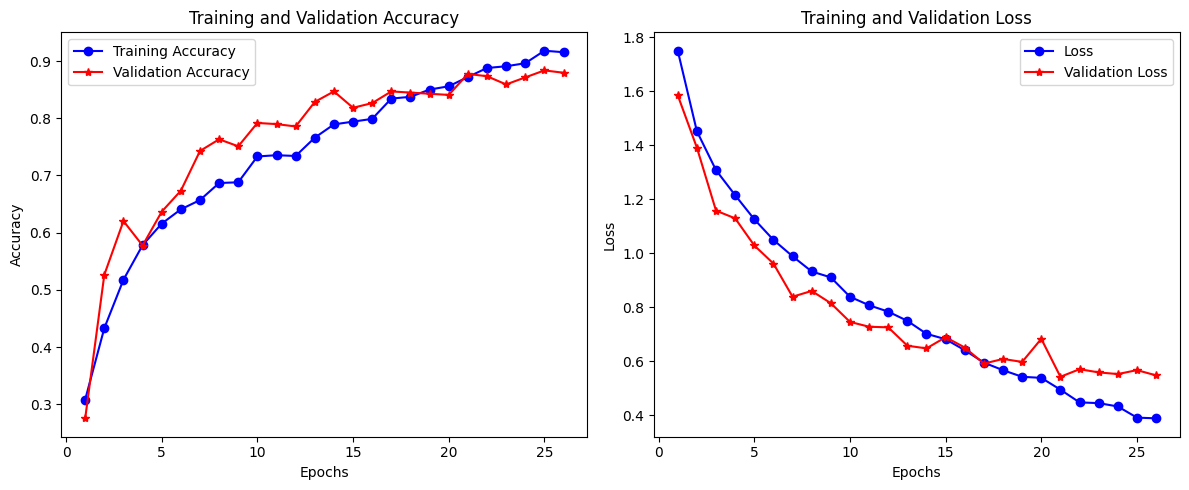

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

history_df = history.history

acc = history_df['accuracy']
val_acc = history_df['val_accuracy']
loss = history_df['loss']
val_loss = history_df['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [51]:
test_loss, test_accuracy = model.evaluate([x_test], [y_test], batch_size=BATCH_SIZE)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8141 - loss: 0.6471
Test Loss: 0.5382168889045715
Test Accuracy: 0.8839103579521179


In [52]:
y_pred= model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [53]:
y_pred = np.argmax(y_pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_new,y_pred))


              precision    recall  f1-score   support

           0       0.98      0.78      0.87       139
           1       0.79      0.91      0.84       141
           2       0.89      0.85      0.87        75
           3       0.91      0.99      0.95       136

    accuracy                           0.88       491
   macro avg       0.89      0.88      0.88       491
weighted avg       0.89      0.88      0.88       491



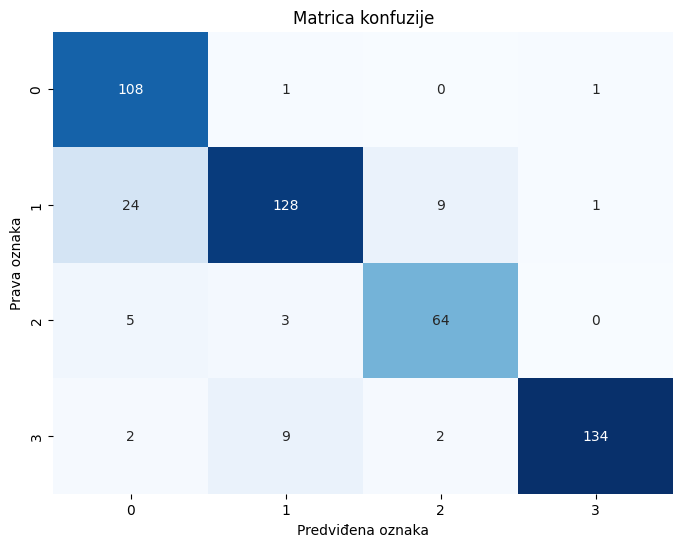

In [55]:
cm = confusion_matrix(y_pred, y_test_new)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrica konfuzije")
plt.xlabel("Predviđena oznaka")
plt.ylabel("Prava oznaka")

plt.show()